In [1]:
import os 
os.chdir("/home/psenin/git/saxpy")
#os.chdir('C:/Users/ng6e164/PycharmProjects/saxpy')
os.getcwd()

'/home/psenin/git/saxpy'

In [2]:
import numpy as np
from saxpy.sax import sax_via_window
from saxpy.saxvsm import series_to_wordbag
from saxpy.saxvsm import manyseries_to_wordbag
from saxpy.saxvsm import bags_to_tfidf

In [3]:
dat = np.array([0., 0., 0., 0., 0., -0.270340178359072, -0.367828308500142,
                0.666980581124872, 1.87088147328446, 2.14548907684624,
                -0.480859313143032, -0.72911654245842, -0.490308602315934,
                -0.66152028906509, -0.221049033806403, 0.367003418871239,
                0.631073992586373, 0.0487728723414486, 0.762655178750436,
                0.78574757843331, 0.338239686422963, 0.784206454089066,
                -2.14265084073625, 2.11325193044223, 0.186018356196443,
                0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.519132472499234,
                -2.604783141655, -0.244519550114012, -1.6570790528784,
                3.34184602886343, 2.10361226260999, 1.9796808733979,
                -0.822247322003058, 1.06850578033292, -0.678811824405992,
                0.804225748913681, 0.57363964388698, 0.437113583759113,
                0.437208643628268, 0.989892093383503, 1.76545983424176,
                0.119483882364649, -0.222311941138971, -0.74669456611669,
                -0.0663660879732063, 0., 0., 0., 0., 0.,])
sax1 = sax_via_window(dat, 6, 3, 3, "none", 0.01)
sax1

defaultdict(list,
            {'aac': [4, 10, 11, 30, 35],
             'abc': [12, 14, 36, 44],
             'acb': [5, 16, 21, 37, 43],
             'acc': [13, 52, 53],
             'bac': [3, 19, 34, 45, 51],
             'bba': [31],
             'bbb': [15, 18, 20, 22, 25, 26, 27, 28, 29, 41, 42, 46],
             'bbc': [2],
             'bca': [6, 17, 32, 38, 47, 48],
             'caa': [8, 23, 24, 40],
             'cab': [9, 50],
             'cba': [7, 39, 49],
             'cbb': [33],
             'cca': [0, 1]})

In [4]:
f1 = series_to_wordbag(dat, 6, 3, 3, "none", 0.01)
f1

{'aac': 5,
 'abc': 4,
 'acb': 5,
 'acc': 3,
 'bac': 5,
 'bba': 1,
 'bbb': 12,
 'bbc': 1,
 'bca': 6,
 'caa': 4,
 'cab': 2,
 'cba': 3,
 'cbb': 1,
 'cca': 2}

In [5]:
m = np.matrix([dat,dat])
m.shape
f2 = manyseries_to_wordbag(m, 6, 3, 3, "none", 0.01)
f2

{'aac': 10,
 'abc': 8,
 'acb': 10,
 'acc': 6,
 'bac': 10,
 'bba': 2,
 'bbb': 24,
 'bbc': 2,
 'bca': 12,
 'caa': 8,
 'cab': 4,
 'cba': 6,
 'cbb': 2,
 'cca': 4}

In [6]:
bag1 = { "this": 10, "is": 1, "a": 2, "sample": 1}
bag2 = { "this": 10, "is": 1, "another": 2, "example": 3}
bags = {"bag1":bag1, "bag2":bag2}
str(bags)

"{'bag2': {'another': 2, 'example': 3, 'is': 1, 'this': 10}, 'bag1': {'a': 2, 'sample': 1, 'is': 1, 'this': 10}}"

In [7]:
[*bags.copy()]

['bag2', 'bag1']

In [8]:
res = bags_to_tfidf(bags)
res

{'classes': ['bag2', 'bag1'],
 'vectors': {'a': [0.0, 0.761500010418809],
  'another': [0.761500010418809, 0.0],
  'example': [0.9609060278364028, 0.0],
  'sample': [0.0, 0.4804530139182014]}}

In [9]:
res["vectors"]

{'a': [0.0, 0.761500010418809],
 'another': [0.761500010418809, 0.0],
 'example': [0.9609060278364028, 0.0],
 'sample': [0.0, 0.4804530139182014]}

In [10]:
import re

def read_data_file(fname):
    
    data = []
    
    with open(fname, 'r') as fp:
        read_lines = fp.readlines()
        for line in read_lines:
            tokens = re.split("\\s+", line.strip())
            data_line = []
            for token in tokens:
                data_line.append(float(token))
            class_label = data_line.pop(0)
            data.append((class_label, data_line))
        
    res = {}
    for key, arr in data:
        key = str(int(key))
        if key in res.keys():
            res[key].append(arr)
        else:
            dat = [arr]
            res[key] = dat
    
    return res
            
dd = read_data_file('resources/data/cbf/CBF_TRAIN')

In [11]:
for key, arr in dd.items():
    print(key)

2
1
3


In [24]:
bag1 = manyseries_to_wordbag(dd['1'], 30, 6, 6, "none", 0.01)
bag2 = manyseries_to_wordbag(dd['2'], 30, 6, 6, "none", 0.01)
bag3 = manyseries_to_wordbag(dd['3'], 30, 6, 6, "none", 0.01)

In [25]:
bags = {'1' : bag1, '2' : bag2, '3' : bag3}
[*bags.copy()]

['2', '1', '3']

In [26]:
vectors = bags_to_tfidf(bags)
vectors['classes']

['2', '1', '3']

In [36]:
import math

def tfidf_to_vector(tfidf, vector_label):
    if vector_label in tfidf['classes']:
        idx = tfidf['classes'].index(vector_label)
        weight_vec = {}
        for word, weights in tfidf['vectors'].items():
            weight_vec[word] = weights[idx]
        return weight_vec
    else:
        return []

def cosine_measure(weight_vec, test_bag):
    sumxx, sumxy, sumyy = 0, 0, 0
    for word in set([*weight_vec.copy()]).union([*test_bag.copy()]):
        x, y = 0, 0
        if word in weight_vec.keys():
            x = weight_vec[word]
        if word in test_bag.keys():
            y = test_bag[word]
        sumxx += x*x
        sumyy += y*y
        sumxy += x*y
    return sumxy/math.sqrt(sumxx*sumyy)
    
def cosine_similarity(tfidf, test_bag):
    res = {}
    for cls in tfidf['classes']:
        res[cls] = 1. - cosine_measure( tfidf_to_vector(tfidf, cls), test_bag)

    return res

def class_for_bag(similarity_dict):
    #do i need to take care about equal values?
    return min(similarity_dict, key=lambda x: similarity_dict[x])

In [37]:
a = [2, 0, 1, 1, 0, 2, 1, 1]
b = [2, 1, 1, 0, 1, 1, 1, 1]

sumxx, sumxy, sumyy = 0, 0, 0
for i in range(0,8):
    x, y = 0, 0
    x = a[i]
    y = b[i]
    sumxx += x*x
    sumyy += y*y
    sumxy += x*y

cs = sumxy/math.sqrt(sumxx*sumyy)
print(cs, "; ", str(1-cs))

#0.822      

0.8215838362577491 ;  0.1784161637422509


In [38]:
dt = read_data_file('resources/data/cbf/CBF_TEST')

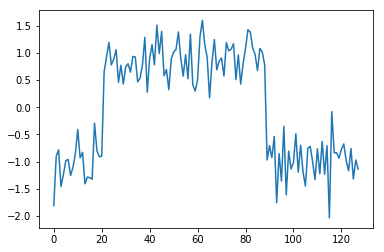

In [39]:
import matplotlib.pyplot as plt
import datetime
import numpy as np

series = dt['1'][6]
x = np.arange(0, len(series))
y = np.asarray(series)

plt.plot(x,y)
plt.show()

In [40]:
test_bag = series_to_wordbag(series, 30, 6, 6, "exact", 0.01)
#test_bag

In [41]:
res = cosine_similarity(vectors, test_bag)
res

{'1': 0.8073717951142745, '2': 0.9142667311197143, '3': 0.9590228930542796}

In [42]:
class_for_bag(res)

'1'

In [53]:
for cls in [*dt.copy()]:
    print(cls)
    i = 0
    for s in dt[cls]:
        sim = cosine_similarity(vectors, 
                                series_to_wordbag(s, 30, 6, 6, "exact", 0.01))
        res = class_for_bag(sim)
        if res != cls:
            print(" misclassified", i, "as", res, sim)
        i = i + 1
        

2
1
 misclassified 72 as 2 {'2': 0.8989257549765389, '3': 0.9426598044037542, '1': 0.9272114168380257}
 misclassified 91 as 2 {'2': 0.8854165617091055, '3': 0.9576460216919762, '1': 0.89152363720531}
 misclassified 135 as 2 {'2': 0.89323096825444, '3': 0.959906510306757, '1': 0.8942768618762522}
 misclassified 256 as 2 {'2': 0.9148941582128944, '3': 0.9461280335527645, '1': 0.9292332510045271}
3
 misclassified 223 as 1 {'2': 0.9829707843618003, '3': 0.8836598869169207, '1': 0.8605901312706783}


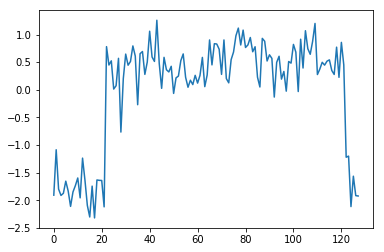

In [46]:
series = dt['1'][256]
x = np.arange(0, len(series))
y = np.asarray(series)
plt.plot(x,y)
plt.show()

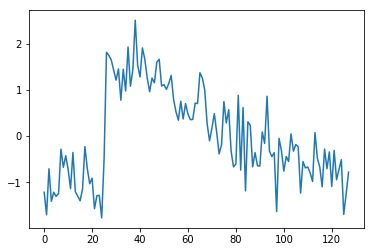

In [51]:
series = dt['3'][223]
x = np.arange(0, len(series))
y = np.asarray(series)
plt.plot(x,y)
plt.show()

In [ ]:
series = dd['3'][4]
x = np.arange(0, len(series))
y = np.asarray(series)

plt.plot(x,y)
plt.show()

In [ ]:
from numpy import dot
from numpy.linalg import norm


def cosine_similarity(a, b):
    "compute cosine similarity of v1 to v2: (v1 dot v2)/{||v1||*||v2||)"
    return dot(a, b)/(norm(a)*norm(b))

v1,v2 = [3, 45, 7, 2], [2, 54, 13, 15]
print(v1, v2, cosine_similarity(v1,v2))